(insert introduction and all that)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
star_data <- read_csv("HTRU_2.csv", col_names=FALSE, show_col_types = FALSE) |>
    mutate(X9 = as_factor(X9))

colnames(star_data) <- c("integrated_profile_mean", "integrated_profile_std_dev", 
                         "integrated_profile_excess_kurtosis","integrated_profile_skewness",
                         "dm_snr_curve_mean","dm_snr_curve_st_dev",
                         "dm_snr_curve_excess_kurtosis","dm_snr_curve_skewness",
                         "is_pulsar_star")

glimpse(star_data)

Rows: 17,898
Columns: 9
$ integrated_profile_mean            <dbl> 140.56250, 102.50781, 103.01562, 13…
$ integrated_profile_std_dev         <dbl> 55.68378, 58.88243, 39.34165, 57.17…
$ integrated_profile_excess_kurtosis <dbl> -0.23457141, 0.46531815, 0.32332837…
$ integrated_profile_skewness        <dbl> -0.69964840, -0.51508791, 1.0511644…
$ dm_snr_curve_mean                  <dbl> 3.1998328, 1.6772575, 3.1212375, 3.…
$ dm_snr_curve_st_dev                <dbl> 19.110426, 14.860146, 21.744669, 20…
$ dm_snr_curve_excess_kurtosis       <dbl> 7.975532, 10.576487, 7.735822, 6.89…
$ dm_snr_curve_skewness              <dbl> 74.24222, 127.39358, 63.17191, 53.5…
$ is_pulsar_star                     <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


In [4]:
star_num_table <- star_data |>
    group_by(is_pulsar_star) |>
    summarize(num_stars = n())
star_num_table

is_pulsar_star,num_stars
<fct>,<int>
0,16259
1,1639


In [5]:
star_means_table <- star_data |>
    group_by(is_pulsar_star)|>
    summarize(across(integrated_profile_mean:dm_snr_curve_skewness, mean))
star_means_table

is_pulsar_star,integrated_profile_mean,integrated_profile_std_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,116.56273,47.33974,0.2104401,0.380844,8.863258,23.28798,8.862674,113.62034
1,56.69061,38.71060,3.1306554,15.553576,49.825995,56.46896,2.757069,17.93173


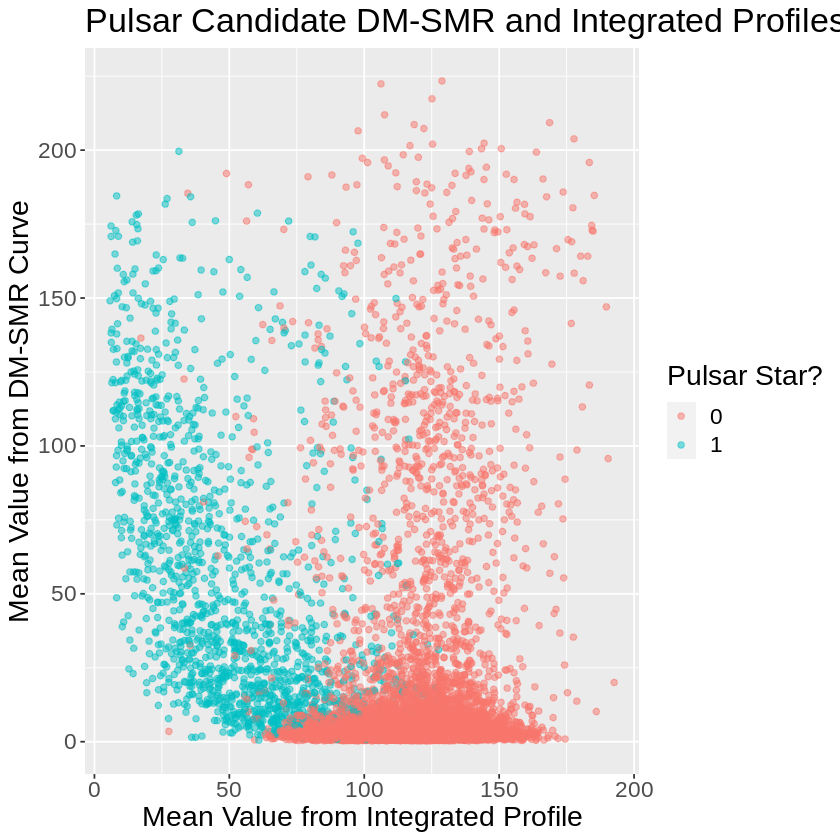

In [14]:
ggplot(star_data, aes(x = integrated_profile_mean, y = dm_snr_curve_mean, color = is_pulsar_star)) +
    geom_point(alpha=0.5) +
    labs(x = "Mean Value from Integrated Profile",
         y = "Mean Value from DM-SMR Curve",
         color = "Pulsar Star?") +
    ggtitle("Pulsar Candidate DM-SMR and Integrated Profiles") +
    theme(text = element_text(size = 17))